# item-based Sander en Hugo

In [16]:
import json
from pandas import Series, Timestamp
import pandas as pd
from pandas import DataFrame
from numpy import nan
from sklearn.metrics import median_absolute_error
import sklearn.metrics.pairwise as pw
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [17]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [42]:
data_path = '../data/brossard/'
review_file = 'review.json'
reviews = load_jsons(data_path, review_file)

display(reviews.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Ccc3ZAXEw69lGZg5oAZKHw,YZ7S0_eemKwWR5tHkaMUqw,JD55YRLwptXJVkMRekbzNg,2.0,0,0,0,Average food and service. Kind of dirty and so...,2017-08-16 04:35:11
1,aZOOTcXB28ftRZJnQDMjjA,UiU_yqwSQwTZdw3vxD_Aag,JD55YRLwptXJVkMRekbzNg,4.0,0,0,0,Probably one of the best Vietnamese restaurant...,2017-12-02 20:13:24
2,9qRSlEj4Rcd3NXektgI1hA,vu9dmqZiZSm3ijUP-7HmKA,VvZnozdEpjw0e7Dg-kKIxg,4.0,0,0,0,"Petit restaurant, déco un peu vieillote, mais ...",2014-10-27 03:10:16
3,KTcqaTj8sHT0zJ0V-p1Kjg,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0,0,0,"We went there on a friday night, the whole pla...",2017-01-14 21:20:25
4,22vF44g9TIDsQOpmvVVg6A,_FKhZ0r6uTBNHA_ALWyGqg,KE7cmEKW8IwMFAdmzP72rQ,1.0,1,0,0,Pour un restaurant Italien qui pense que Sauce...,2015-06-08 19:09:25
5,Dh3cd2NftMcHujCLdtsKLg,fHKUUSRX1weaARD1XCQC_w,kVKCzeRWO6OleRqho57fAQ,4.0,0,0,0,My friend and I paid $25 each (taxes included)...,2014-05-26 03:46:24
6,yFeTh3MYalSfd8SShQGc-A,97l5KYYQ7QVA_J5B0Q2xmw,JD55YRLwptXJVkMRekbzNg,3.0,1,0,1,Went there on a thursday afternoon and there w...,2018-09-14 03:49:28
7,uhVfYSRoTFdw82fRzAujYw,UDFIZXP0kOb2xKoYToTS6w,7K9EGbodeoDoOzQvkNPoAw,4.0,4,0,2,Who knew a trip to the movies could be so high...,2014-10-27 14:43:44
8,XevaiQwcHM8c8LsooiUhtQ,ngZoUVDK7nFHB_HXBeQkiw,JD55YRLwptXJVkMRekbzNg,3.0,0,0,0,"Food is decent, but way too much MSG. I just h...",2017-05-13 17:42:21
9,CTyatTfpnyA3J55YhTLE3g,41kMyI1BfOTyIIAenUSaTQ,VvZnozdEpjw0e7Dg-kKIxg,4.0,2,2,1,Drove by here on the way home as I wanted some...,2015-03-05 03:12:41


## Split test and training set

In [19]:
def split_data(data, d = 0.75):
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

reviews_training, reviews_test = split_data(reviews, d=0.9)

## Pivot a utility table

In [20]:
def pivot_ratings(df):
    return df.pivot_table(values='stars', columns='user_id', index='business_id')

review_utitity_ratings = pivot_ratings(reviews_training)
display(review_utitity_ratings.head())

user_id,-01y5njeBMu1eAdIKdGG1g,-0SqALqeWmInVftG_iHcHg,-41z9zaHp6oONyUNfMDZjw,-5rgQfe0j-0AGl4B9g7DQg,-B4Cf2XLkPr9qMlLPHJAlw,-HHyrZ15Yr-3vDfo087n0A,-HMryuf0scfllObkYFF0hg,-LdOcazGWhUVrrLNpUgfvQ,-MlnpvmMOE9lb3noLlr6bQ,-OnlG_cVLxqUS_2_gCYqhA,...,ysnP1M717ewk8-BjxpzJOQ,zHvAuiMHZEgoXHFDMfszKw,zLkbxR1IvwnEbbztvZDfmw,zUFamSWdxK0qUS7Uwajf9g,zWWcik1fRPZviBCQLC26FQ,zg-C8Gu-tZq_RVoZhUOMQw,zhg-j5H6UsCd_DnpvNIprA,zhoytEzEitvTtUfXU99cIA,zmhC7E1NGHNGf0ITtsxGuw,ztnFttrQ7Rz5neGMcFsXxg
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-juOL0eJC6kvf5RLEjoPvA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN
-yEFjBrxf2r_BQzRnczzdw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1blpPH0_3jk2EnRz_Q_CuQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1h3aXVtJLx2o4mArNuhf2w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0


## Create similarity matrices

In [21]:
def create_similarity_matrix_cosine(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_euclidean(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.euclidean_distances(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_I(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.polynomial_kernel(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_II(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.sigmoid_kernel(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)



In [44]:
def mean_center_columns(matrix):
    mean_center_columns = matrix.copy()
    for user in mean_center_columns:
        mean_center = mean_center_columns[user].mean()
        for movie in mean_center_columns.index:
            mean_center_columns.at[movie, user] = mean_center_columns.at[movie, user] - mean_center
    return mean_center_columns

In [46]:
cosine_similarity_ratings = mean_center_columns(create_similarity_matrix_cosine(review_utitity_ratings))
display(cosine_similarity_ratings.head(5))

euclidean_similarity_ratings = mean_center_columns(create_similarity_matrix_euclidean(review_utitity_ratings))
display(euclidean_similarity_ratings.head(5))

I_similarity_ratings = mean_center_columns(create_similarity_matrix_I(review_utitity_ratings))
display(I_similarity_ratings.head(5))

II_similarity_ratings = mean_center_columns(create_similarity_matrix_II(review_utitity_ratings))
display(II_similarity_ratings.head(5))

business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,0.997879,0.009014,-0.004102,-0.004043,0.002467,0.001596,-0.006683,-0.000896,0.002367,-0.001232,...,-0.000299,0.002047,-0.000637,-0.006686,0.002005,-0.004029,-0.004102,0.000539,0.002072,0.002735
-juOL0eJC6kvf5RLEjoPvA,-0.002121,1.009014,-0.267101,-0.004043,-0.017233,-0.153009,-0.267780,0.073967,0.055109,-0.001232,...,-0.443321,0.058494,-0.000637,-0.264364,0.002005,-0.004029,-0.161072,0.000539,-0.004078,0.170806
-yEFjBrxf2r_BQzRnczzdw,-0.002121,-0.253985,0.995898,-0.004043,0.002467,0.015747,-0.006683,-0.000896,0.002367,-0.001232,...,-0.000299,0.002047,-0.000637,-0.006686,0.002005,-0.004029,-0.004102,-0.025330,0.009714,0.010207
1blpPH0_3jk2EnRz_Q_CuQ,-0.002121,0.009014,-0.004102,0.995957,0.002467,0.001596,-0.006683,-0.506796,0.002367,-0.001232,...,-0.000299,0.249073,-0.000637,-0.006686,0.002005,-0.004029,0.406302,0.075717,0.037952,0.002735
1h3aXVtJLx2o4mArNuhf2w,-0.002121,-0.010686,-0.004102,-0.004043,1.002467,0.040822,-0.006683,-0.015838,-0.059578,0.242943,...,0.089902,0.002047,-0.000637,-0.006686,0.002005,-0.004029,0.032623,-0.621979,-0.020076,-0.078100


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,-2.234952,-0.249759,-0.595430,-0.724027,-0.403690,-0.512801,-0.724043,-0.479799,-0.387347,-0.711282,...,-0.363822,-0.392385,-0.501771,-0.575464,-0.557327,-0.692325,-0.316361,-0.470949,-0.339682,-0.335299
-juOL0eJC6kvf5RLEjoPvA,3.505989,-5.990699,3.724414,3.750751,2.750851,3.400145,3.826269,2.878895,2.469967,3.678944,...,3.776967,2.523183,3.052287,3.726978,3.235428,3.620467,2.859614,2.944896,2.451398,1.825290
-yEFjBrxf2r_BQzRnczzdw,-0.348616,0.215480,-2.481766,-0.335081,-0.249822,-0.320062,-0.327259,-0.281209,-0.241336,-0.347752,...,-0.226611,-0.240761,-0.298990,-0.316191,-0.320814,-0.350047,-0.197390,-0.251423,-0.223744,-0.221691
1blpPH0_3jk2EnRz_Q_CuQ,-1.069000,-0.349969,-0.926867,-1.889979,-0.577828,-0.762269,-1.474456,-0.552517,-0.551752,-1.290834,...,-0.517497,-0.646069,-0.740520,-0.901694,-0.846140,-1.201393,-0.585891,-0.711532,-0.492709,-0.473466
1h3aXVtJLx2o4mArNuhf2w,1.126979,0.525773,1.034033,1.297814,-3.765621,0.829200,1.317458,0.904903,0.829906,1.093918,...,0.439683,0.716674,0.875159,1.042540,0.969610,1.202853,0.498412,1.905728,0.673825,0.805470


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,4.397470e-03,-0.000031,-2.483438e-07,-4.838135e-08,-0.000005,-0.000003,-3.945773e-08,-0.000004,-0.000004,-7.735713e-08,...,-0.000007,-0.000007,-9.922608e-07,-0.000002,-0.000001,-1.190100e-08,-0.000015,-0.000002,-0.000009,-0.000009
-juOL0eJC6kvf5RLEjoPvA,-6.101296e-08,0.115543,-7.883424e-03,-4.838135e-08,-0.001240,-0.006520,-1.014205e-03,0.003419,0.003516,-7.735713e-08,...,-0.031388,0.003599,-9.922608e-07,-0.007882,-0.000001,-1.190100e-08,-0.013133,-0.000002,-0.000490,0.013500
-yEFjBrxf2r_BQzRnczzdw,-6.101296e-08,-0.007915,8.130344e-03,-4.838135e-08,-0.000005,0.000158,-3.945773e-08,-0.000004,-0.000004,-7.735713e-08,...,-0.000007,-0.000007,-9.922608e-07,-0.000002,-0.000001,-1.190100e-08,-0.000015,-0.000349,0.000152,0.000153
1blpPH0_3jk2EnRz_Q_CuQ,-6.101296e-08,-0.000031,-2.483438e-07,3.844662e-04,-0.000005,-0.000003,-3.945773e-08,-0.001360,-0.000004,-7.735713e-08,...,-0.000007,0.000919,-9.922608e-07,-0.000002,-0.000001,-1.190100e-08,0.002010,0.000218,0.000156,-0.000009
1h3aXVtJLx2o4mArNuhf2w,-6.101296e-08,-0.001266,-2.483438e-07,-4.838135e-08,0.035726,0.000931,-3.945773e-08,-0.000388,-0.002328,1.660677e-03,...,0.003633,-0.000007,-9.922608e-07,-0.000002,-0.000001,-1.190100e-08,0.001721,-0.017325,-0.000984,-0.003646


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,6.140381e-04,0.000003,2.647583e-08,5.158287e-09,4.933811e-07,3.045902e-07,4.206691e-09,3.804874e-07,4.424856e-07,8.247439e-09,...,7.745754e-07,7.258685e-07,1.056710e-07,2.559472e-07,1.092136e-07,1.268378e-09,0.000002,1.940275e-07,9.412042e-07,9.024019e-07
-juOL0eJC6kvf5RLEjoPvA,6.503211e-09,0.015161,-1.108685e-03,5.158287e-09,-1.725244e-04,-9.156036e-04,-1.420549e-04,4.785774e-04,4.922439e-04,8.247439e-09,...,-4.474911e-03,5.044825e-04,1.056710e-07,-1.108019e-03,1.092136e-07,1.268378e-09,-0.001849,1.940275e-07,-6.642499e-05,1.877054e-03
-yEFjBrxf2r_BQzRnczzdw,6.503211e-09,-0.001105,1.132834e-03,5.158287e-09,4.933811e-07,2.288509e-05,4.206691e-09,3.804874e-07,4.424856e-07,8.247439e-09,...,7.745754e-07,7.258685e-07,1.056710e-07,2.559472e-07,1.092136e-07,1.268378e-09,0.000002,-4.838045e-05,2.352170e-05,2.348290e-05
1blpPH0_3jk2EnRz_Q_CuQ,6.503211e-09,0.000003,2.647583e-08,5.382175e-05,4.933811e-07,3.045902e-07,4.206691e-09,-1.897007e-04,4.424856e-07,8.247439e-09,...,7.745754e-07,1.303323e-04,1.056710e-07,2.559472e-07,1.092136e-07,1.268378e-09,0.000285,3.092814e-05,2.402626e-05,9.024019e-07
1h3aXVtJLx2o4mArNuhf2w,6.503211e-09,-0.000170,2.647583e-08,5.158287e-09,4.899934e-03,1.309009e-04,4.206691e-09,-5.341246e-05,-3.252762e-04,2.322732e-04,...,5.092903e-04,7.258685e-07,1.056710e-07,2.559472e-07,1.092136e-07,1.268378e-09,0.000244,-2.449811e-03,-1.356746e-04,-5.093761e-04


## Predict ratings

In [48]:
def predict_ratings(similarity, utility, to_predict):
    ratings_test_c = to_predict.copy()
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

def predict_ids(similarity, utility, user_id, business_id):
    if user_id in utility.columns and business_id in similarity.index:
        return predict_vectors(utility.loc[:,user_id], similarity[business_id])
    return 0

def predict_vectors(user_ratings, similarities):
    relevant_ratings = user_ratings.dropna()
    similarities_s = similarities[relevant_ratings.index]
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    return np.dot(relevant_ratings, similarities_s)/norm



In [49]:
predicted_item_based_cosine = predict_ratings(cosine_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_cosine.head(5))

predicted_item_based_euclidean = predict_ratings(euclidean_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_euclidean.head(5))

predicted_item_based_I = predict_ratings(I_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_I.head(5))

predicted_item_based_II = predict_ratings(II_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_II.head(5))


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,4.000000
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,4.242116
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.714450
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,3.826101
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,4.000000
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,4.160355
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.999824
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,4.158452
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


### EVALUATION



In [50]:
treshold_used = 4

def get_confusion(prediction, treshold):
    re = recommended(prediction, treshold)
    hi = hidden(prediction, treshold)
    us = used(prediction, treshold_used)
    un = unused(prediction, treshold_used)
    
    return confusion(re, hi, us, un)

def recommended(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] >= treshold]
    return predictions

def hidden(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] < treshold]
    return predictions

def used(predictions, treshold):
    predictions = predictions[predictions["stars"] >= treshold]
    return predictions
    
def unused(predictions, treshold):
    predictions = predictions[predictions["stars"] < treshold]
    return predictions

def confusion(recommended, hidden, used, unused):
    true_positive = len(recommended.index.intersection(used.index))
    false_positive = len(recommended.index.intersection(unused.index))
    true_negative = len(hidden.index.intersection(unused.index))
    false_negative = len(hidden.index.intersection(used.index))
    
    solution = pd.DataFrame([[true_positive, false_positive], [false_negative, true_negative]], columns=['used', 'unused'],
                         index=['recommended', 'hidden'])
    return solution
    
def precision(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    recommended = confusion_matrix["used"]["recommended"] + confusion_matrix["unused"]["recommended"]
    return true_positives/recommended

def recall(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    used_items = confusion_matrix["used"]["recommended"] + confusion_matrix["used"]["hidden"]
    return true_positives/used_items

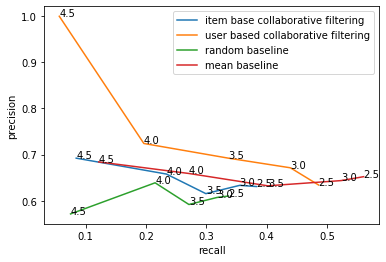

In [55]:
tresholds = [2.5, 3.0, 3.5, 4.0, 4.5]

def plot_precision_recall(prediction, tresholds):
    recalls = []
    precisons = []
    for treshold in tresholds:
        confusion = get_confusion(prediction, treshold)
        precisons.append(precision(confusion))
        recalls.append(recall(confusion))
    
    plt.plot(recalls, precisons)
    for r, p, t in zip(recalls, precisons, tresholds):
        plt.text(r, p, t)
        


plt.xlabel('recall')
plt.ylabel('precision')        

plot_precision_recall(predicted_item_based_cosine, tresholds)        
plot_precision_recall(predicted_item_based_euclidean, tresholds)
plot_precision_recall(predicted_item_based_I, tresholds) 
plot_precision_recall(predicted_item_based_II, tresholds)        

plt.legend(['item base collaborative filtering', 'user based collaborative filtering', 'random baseline','mean baseline '], loc = 'upper right')

In [52]:
cosine_median_error = median_absolute_error(predicted_item_based_cosine["stars"], predicted_item_based_cosine["predicted rating"])
euclidean_median_error = median_absolute_error(predicted_item_based_euclidean["stars"], predicted_item_based_euclidean["predicted rating"])
I_median_error = median_absolute_error(predicted_item_based_I["stars"], predicted_item_based_I["predicted rating"])
II_median_error = median_absolute_error(predicted_item_based_II["stars"], predicted_item_based_II["predicted rating"])


In [53]:
print('           | median absolute error')
print(f'cosine similarity |      {cosine_median_error:.2f}')
print(f'euclidean similarity |      {euclidean_median_error:.2f}')
print(f'I similarity |      {I_median_error:.2f}')
print(f'II similarity |      {II_median_error:.2f}')


           | median absolute error
cosine similarity |      2.00
euclidean similarity |      1.24
I similarity |      2.00
II similarity |      1.06
